Problem Description: https://fivethirtyeight.com/features/pirates-monkeys-and-coconuts-oh-my/

> Seven pirates wash ashore on a deserted island after their ship sinks. In order to survive, they gather as many coconuts as they can find and throw them into a central pile. As the sun sets, they all go to sleep.

> One pirate wakes up in the middle of the night. Being the greedy person he is, this pirate decides to take some coconuts from the pile and hide them for himself. As he approaches the pile, though, he notices a monkey watching him. To keep the monkey quiet, the pirate tosses it one coconut from the pile. He then divides the rest of the pile into seven equally sized bunches and hides one of the bunches in the bushes. Finally, he recombines the remaining coconuts into a single pile and goes back to sleep. (Note that individual coconuts are very hard, and therefore indivisible.)

>Later that night, a second pirate wakes up with the same idea. She tosses the monkey one coconut from the central pile, divides the pile into seven bunches, hides her bunch, recombines the rest, and goes back to sleep. After that, a third pirate wakes up and does the same thing. Then a fourth. Then a fifth, and so on until all seven pirates have hidden a share of the coconuts.

>In the morning, the pirates look at the remaining central pile and notice that it has gotten quite small. They decide to split the pile into seven equal bunches and take one bunch each. (Note: The monkey does not get one this time.)

>If there were $N$ coconuts in the pile originally, what is the smallest possible value of $N$?

### Solution

Suppose there are $N_0$ coconuts in the pile initially.

After the first pirate takes her stash, there are $N_1 = \frac{6}{7}(N_0-1)$. At every step thereafter we have:

$$N_{k+1} = \frac{6}{7}(N_k - 1) $$

This is a <a href = https://en.wikipedia.org/wiki/Linear_difference_equation> linear difference equation </a> with constant coefficients, and has a closed-form expression:

$$ N_k = \frac{6^{k}(N_0 + 6)}{7^k} - 6 $$

The problem imposes two restrictions:

* $N_0, N_1, ..., N_7$ must all be integers
* In the final step, the pile can be split evenly among the 7 pirates; in other words, $N_7 \equiv 0 \mod 7$

After $k$ steps, the pile will be integer-valued if and only if 

$$6^k(N_0 + 6) \equiv 0 \mod 7^k$$

Since 6 and 7 are coprime, this will happen if and only if $N_0 \equiv -6 \mod 7^k$. However, if $N_0 \equiv -6 \mod 7^k$, then $N_0 \equiv -6 \mod 7^j$ for all $j < k$. So a necessary and sufficent condition for the first restriction is $N_0 \equiv -6 \mod 7^7$. Since $7^7 = 823543,$ the smallest such number of $823537$.

Given $N_0 = 823537$, we can calculate $N_7 = 279930$, which is divisible by 7. Since the second requirement is also satisfied, we've found the solution to the problem. The Python code below verifies that this is the only solution for $N_0 < 10^6$.

In [1]:
import numpy as np

def pile_size(n):
    #Given N_0, calculates N_1, ..., N_7 using the formula above
    k = np.arange(1,8)
    k.shape = (1,7)
    arg = 6**k*n - 6*(7**k - 6**k)
    return arg/7**k

def search(n_min, n_max):
    #Looks for an N_0 that gives integer piles for each N_1, ..., N_7 and N_7 = 0 mod 7
    ns = np.arange(n_min, n_max)
    ns.shape = (ns.size, 1)
    
    #Find values that give integer N_1, ..., N_7
    candidates = ns[np.where(np.max(np.mod(pile_size(ns),1),axis = 1) == 0)]
    
    #Check if N_7 is divisible by 7
    solns = np.where(np.mod(pile_size(candidates)[:,-1],7) == 0)
    return candidates[solns]

search(1,10**6)

array([[823537]])

### Solution for $p$ pirates

Now consider any amount of pirates, $p \in \mathbb{N}$. For $k \in \{1, ..., p\}$, we have

$$N_k = \frac{(p-1)^k(N_0 + p-1)}{p^k} - (p-1) $$

Since $p-1$ and $p$ are relatively prime, this will be integer valued if and only if $N_0 \equiv 1 - p \mod p^k$. Thus $N_1, ..., N_p$ are integer-valued if and only if $N_0 = cp^p + 1 - p$ for some integer $c \geq 1$. In this case,

$$N_p = c(p-1)^p - (p-1) $$

We also require $N_p$ be divisible by $p$, so

$$ c(-1)^p + 1 \equiv 0 \mod p$$

If $p$ is odd, $c = 1$ satisfies this equation, so the minimal number of coconuts is $N_0 = p^p + 1 - p$. If $p$ is even, however, we need $c \equiv -1 \mod p$. Thus for even $p$ the minimal number of coconuts is $N_0 = (p-1)p^p + 1 - p$.

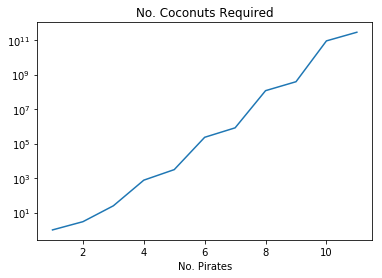

In [2]:
import matplotlib.pyplot as plt

def coconuts(p):
    #p = no. of pirates
    evens = (p-1)*p**p + 1-p
    odds = p**p + 1 - p
    return (np.mod(p,2) == 0)*evens + (np.mod(p,2) == 1)*odds

xs = np.arange(1,12)
plt.plot(xs, coconuts(xs))
plt.semilogy()
plt.title('No. Coconuts Required')
plt.xlabel('No. Pirates')
plt.show()

### An unexpected connection

You might wonder how much of the original pile is left in the morning. For the $p$-pirate problem, the size of the resulting pile is

$$ N_p \approx \left(\frac{p-1}{p}\right)^p N_0 $$

As $p$ gets large, we have

$$\left(\frac{p-1}{p}\right)^p = \left(1 - \frac{1}{p}\right)^p \rightarrow e^{-1} \approx 36.7\% $$

Thus the proportion of the pile remaining stablizes at approximately $1/e$.